In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [16]:
img = load_img()

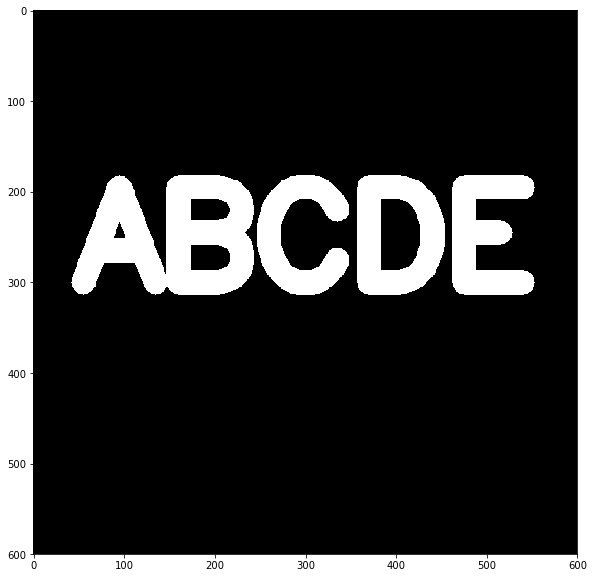

In [5]:
display_img(img)

In [6]:
kernel = np.ones((5,5),np.uint8)
# define kernel

In [7]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [17]:
result = cv2.erode(img,kernel,iterations=4)
# applies a morphological erosion operation, removing edges
# using kernel and is applied 
# for the specifies the number of iterations.

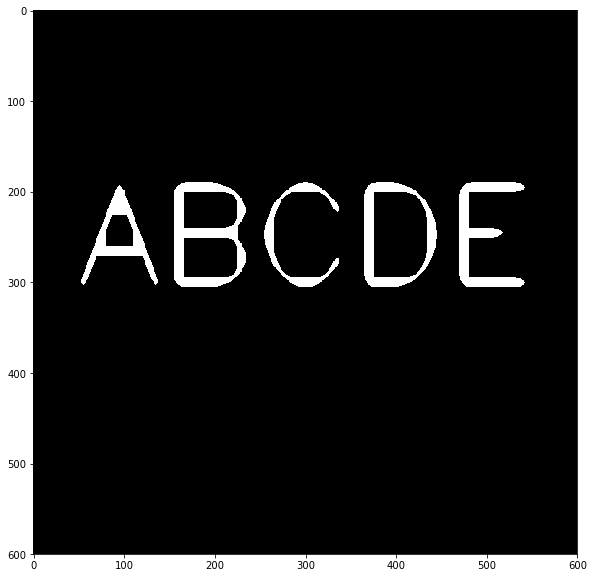

In [18]:
display_img(result)

In [19]:
img = load_img()

In [20]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))
# create an array of noise, zeros and ones, to add to the image
# to simulate noise

In [21]:
white_noise

array([[1, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1]])

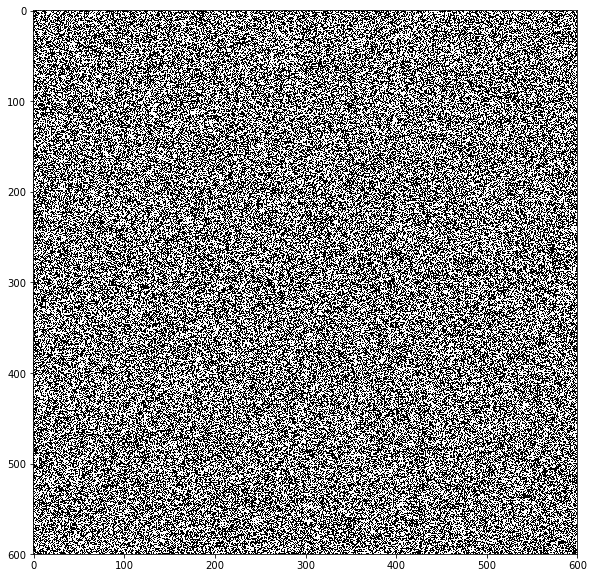

In [22]:
display_img(white_noise)

In [23]:
img.max()

255.0

In [24]:
white_noise = white_noise * 255
# map the noise to be similar to the image to be added together

In [25]:
white_noise

array([[255, 255,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255,   0],
       [255,   0, 255, ...,   0, 255,   0],
       ...,
       [255,   0,   0, ...,   0,   0, 255],
       [255, 255,   0, ...,   0,   0,   0],
       [255,   0, 255, ...,   0,   0, 255]])

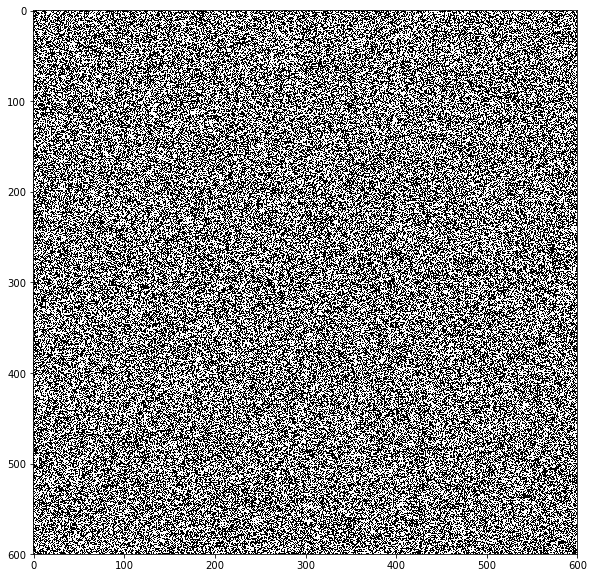

In [26]:
display_img(white_noise)

In [27]:
noise_img = white_noise + img
# add the noise to the image

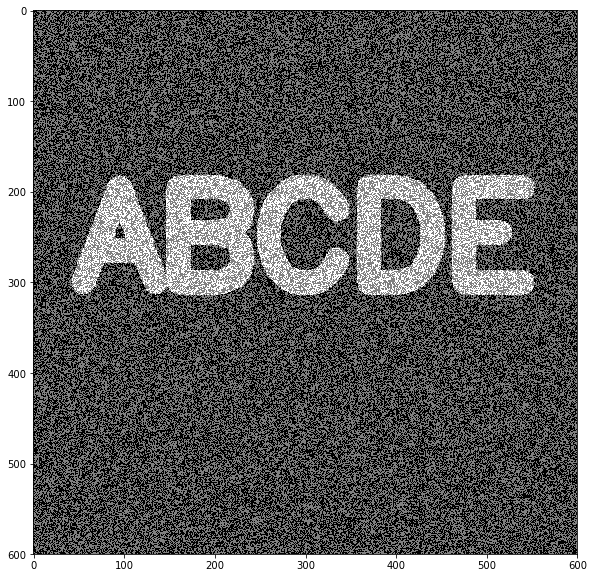

In [28]:
display_img(noise_img)

In [29]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)
# apply opening to the image to remove noise
# opening is erosion + dilation

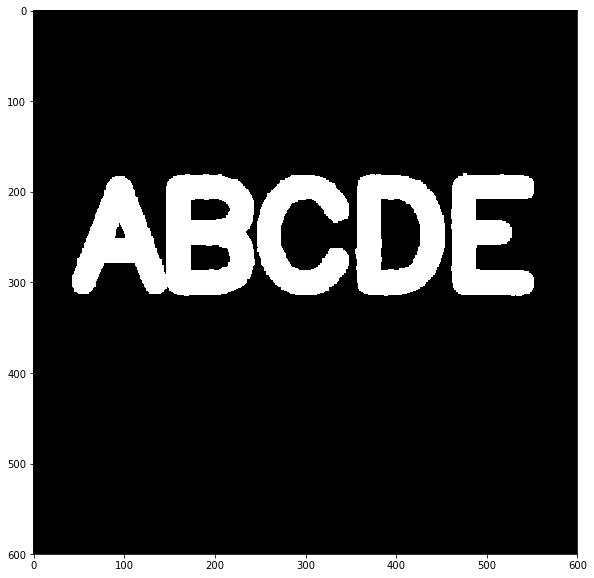

In [30]:
display_img(opening)

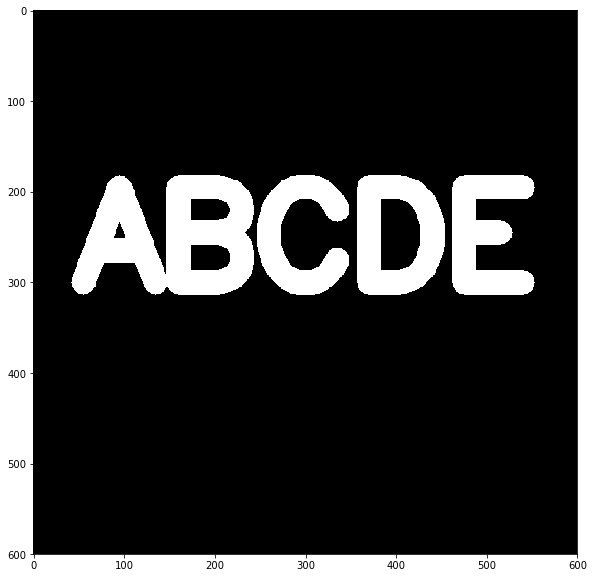

In [31]:
display_img(img)

In [32]:
img = load_img()

In [33]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))
# creating noise in the foreground(the part of a view that 
# is nearest to the observer, especially in a picture or 
# photograph)

In [35]:
black_noise = black_noise * - 255
# to be different than the white noise(background)

In [36]:
black_noise

array([[   0,    0,    0, ..., -255, -255,    0],
       [   0, -255, -255, ...,    0,    0,    0],
       [-255, -255, -255, ...,    0,    0, -255],
       ...,
       [   0,    0, -255, ..., -255, -255,    0],
       [   0,    0,    0, ..., -255, -255,    0],
       [   0,    0, -255, ...,    0,    0,    0]])

In [37]:
black_noise_img = img + black_noise

In [38]:
black_noise_img[black_noise_img==-255] = 0

In [39]:
black_noise_img.min()

0.0

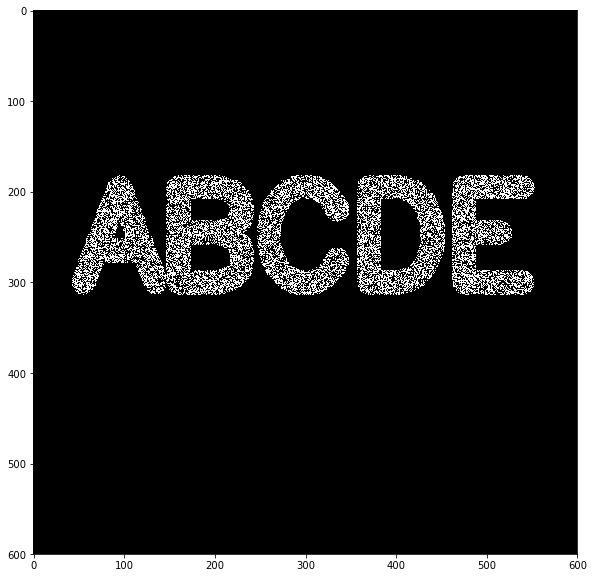

In [40]:
display_img(black_noise_img)
# image with noise in the foreground

In [41]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,
                           kernel)
# removes foreground noise

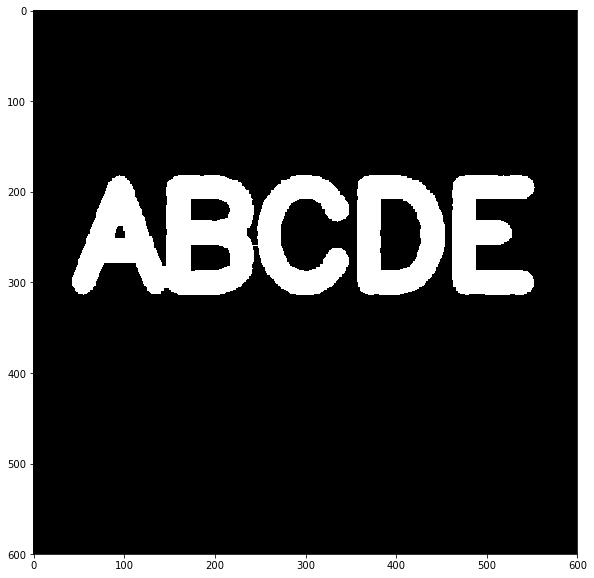

In [42]:
display_img(closing)

In [43]:
img = load_img()

In [45]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
# takes the difference between erosion and dilation, 
# keeping only the edges

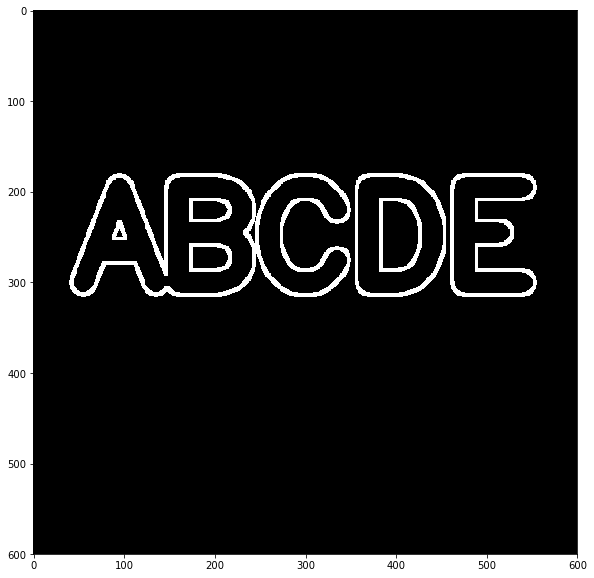

In [46]:
display_img(gradient)